## 4-order simplectic integrator (Yoshida)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm


In [33]:
#definamos nuestro intervalo de tiempo y el paso.
iteraciones=100
t_=np.linspace(0.10,iteraciones)
h_=(10/iteraciones)

#definamos la funcion del oscilador armonico
f_derivada=lambda x:-x


## vamos a definir un integrador de orden 4. Es por ello que trabajaremos con un Runge-Kutta

In [34]:
#definimos las ecuaciones diferenciales del oscilaor armonico
s_derivada=lambda x:-x
p_derivada=lambda v: v


def rugen_kutta4(t,h):
    
    x_=np.zeros(len(t))
    v_=np.zeros(len(t))
    #constantes de inicialización
    x_[0]=0
    v_[0]=0
    
    #definimos los k vectoriales 
    
    K1_=np.zeros(2)
    K2_=np.zeros(2)
    K3_=np.zeros(2)
    K4_=np.zeros(2)
        
   
    for i in range(1, len(t)):

        K1_[0] = h*p_derivada(v_[i-1])
        K1_[1] = h*s_derivada(x_[i-1])
        
        K2_[0] = h*p_derivada(v_[i-1] + 0.5*K1_[1])
        K2_[1] = h*s_derivada(x_[i-1] + 0.5*K1_[0])
        
        K3_[0] = h*p_derivada(v_[i-1] + 0.5*K2_[1])
        K3_[1] = h*s_derivada(x_[i-1] + 0.5*K2_[0])
        
        K4_[0] = h*p_derivada(v_[i-1]+K3_[1])
        K4_[1] = h*s_derivada(x_[i-1]+K3_[0])

        
        x_[i] = x_[i-1]+(K1_[0]+2*K2_[0]+2*K3_[0]+K4_[0])/6
        v_[i] = v_[i-1]+(K1_[1]+2*K2_[1]+2*K3_[1]+K4_[1])/6

    return x_, v_
    

In [35]:
x_positon,v_velocity=rugen_kutta4(t,h)

## Ahora realizaremos el metodo de salto de rana para la resolucion de la ecuacion

In [64]:
def salto_rana(t,h):
    
    
    saltos=np.arange((-1/2)*h,10-(1/2)*h,h)
    
    x_=np.zeros(len(t))
    v_=np.zeros(len(t))
    
    x_pos=[]
    array_x=np.array(x_pos)
    
    v_vel=[]
    array_v=np.array(v_vel)
    
    #constantes de inicialización
    x_[0]=0
    v_[0]=0- 0.5*h*s_derivada(x_[0])
    
    for i in range(1,len(t)):
        
        v_[i]=v_[i-1]+h*s_derivada(x_[i-1])
        x_[i]=x_[i-1]+h*v_[i]
    
    interv=len(x_)-1
    for j in range(interv):
        
        array_x=np.append(array_x,(x_[j]+x_[j+1])*0.5)
        
        
    array_v=v_[j:]
    
    return array_x,array_v

x_salto,v_salto=salto_rana(t_,h_)
        
    
        
    
    
    

## Ahora conseguiremos las energias cinetica y potencial


In [65]:
lista_potencial=[]
lista_cinetica=[]
lista_mecanica=[]

lista_potencial_2=[]
lista_cinetica_2=[]
lista_mecanica_2=[]

cinetica=0
potencial=0
mecanica=0

cinetica_2=0
potencial_2=0
mecanica_2=0

for i in range(len(x_positon)):
    
    potencial=(1/2)*x_positon[i]**2
    cinetica=(1/2)*v_velocity[i]**2
    mecanica=potencial+cinetica

    lista_potencial.append(potencial)
    lista_cinetica.append(cinetica)
    lista_mecanica.append(mecanica)
    
for j in range(len(x_salto)):
    
    potencial_2=(1/2)*x_positon[i]**2
    cinetica_2=(1/2)*v_velocity[i]**2
    mecanica_2=potencial_2+cinetica_2

    lista_potencial_2.append(potencial_2)
    lista_cinetica_2.append(cinetica_2)
    lista_mecanica_2.append(mecanica_2)
    

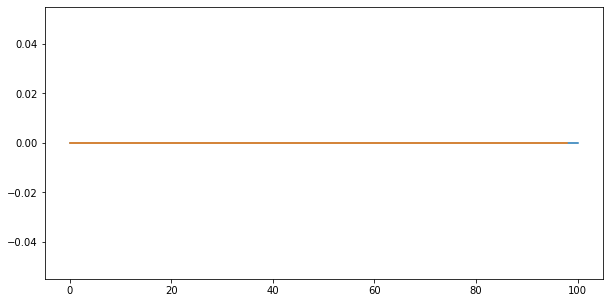

In [67]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(1,1,1)

ax1.plot(t_,lista_mecanica)
ax1.plot(t_[:-1],lista_mecanica_2)

plt.show()